In [ ]:
# Shopping Trends Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import os
import warnings

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:/Users/david/Desktop/Curso ML/Pandas/shopping_trends.csv')

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [25]:
df.groupby(['Age', 'Gender', 'Location']).ngroup().sort_values()

3005       0
3506       1
3560       2
3448       3
3868       4
        ... 
989     2647
325     2648
2151    2648
2068    2648
958     2649
Length: 3900, dtype: int64

In [9]:
df.shape

(3900, 19)

In [11]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [15]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [17]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [21]:
# comporbamos la consistencia de las columnas
# si hubiera inconsistnecia se deberia modificar: cambiar nombre, quitar espacion, etc
print(df['Category'].unique())
print(df['Item Purchased'].unique())

['Clothing' 'Footwear' 'Outerwear' 'Accessories']
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']


In [161]:
df['Customer ID'].unique()

array([   1,    2,    3, ..., 3898, 3899, 3900], dtype=int64)

In [ ]:
# Empezamos análisis exploratorio

<Axes: xlabel='Gender', ylabel='Age'>

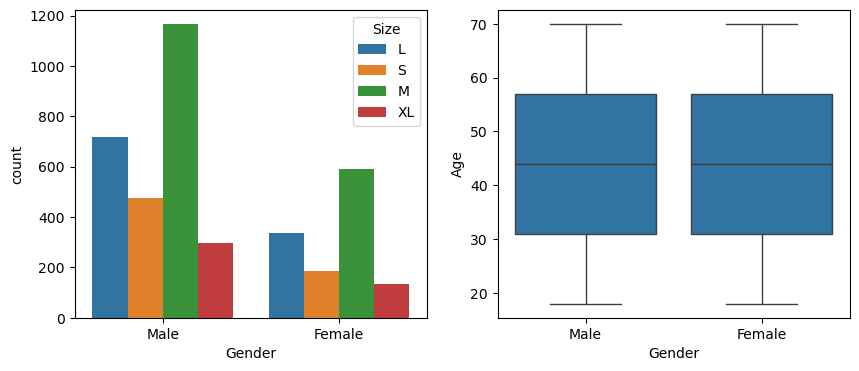

In [99]:
fig, ax=plt.subplots(1,2,figsize=(10,4))
sns.countplot(x=df['Gender'], hue=df['Size'], ax=ax[0])
sns.boxplot(data=df, x='Gender', y ='Age', ax=ax[1])

Text(0.5, 1.0, 'Top productos más vendidos')

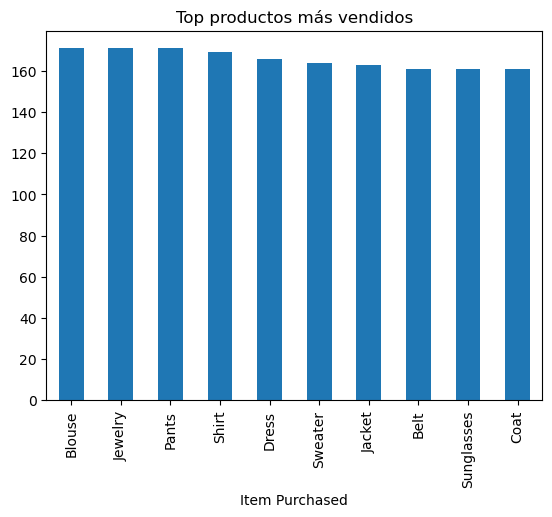

In [79]:
# top items más vendidos
df['Item Purchased'].value_counts().head(10).plot(kind='bar')
plt.title('Top productos más vendidos')

Text(0.5, 1.0, 'USD por categoria')

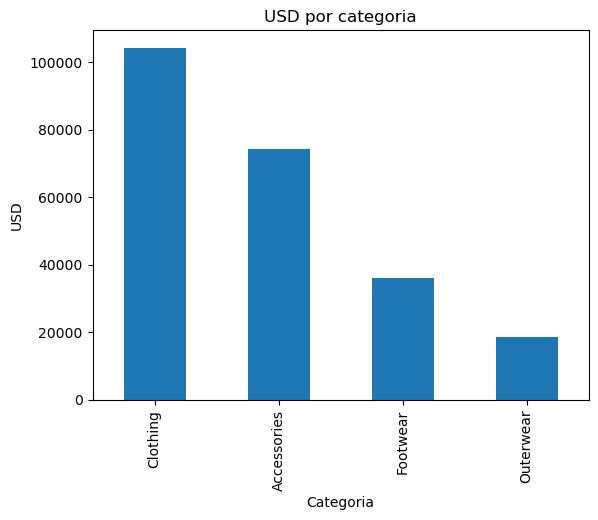

In [87]:
# categorias por importe
df.groupby(['Category'])['Purchase Amount (USD)'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Categoria')
plt.ylabel('USD')
plt.title('USD por categoria')

In [93]:
# ticket medio por cliente
df.groupby(['Customer ID'])['Purchase Amount (USD)'].mean().sort_values(ascending=False)

Customer ID
2843    100.0
96      100.0
582     100.0
1422    100.0
3838    100.0
        ...  
1705     20.0
295      20.0
978      20.0
509      20.0
2799     20.0
Name: Purchase Amount (USD), Length: 3900, dtype: float64

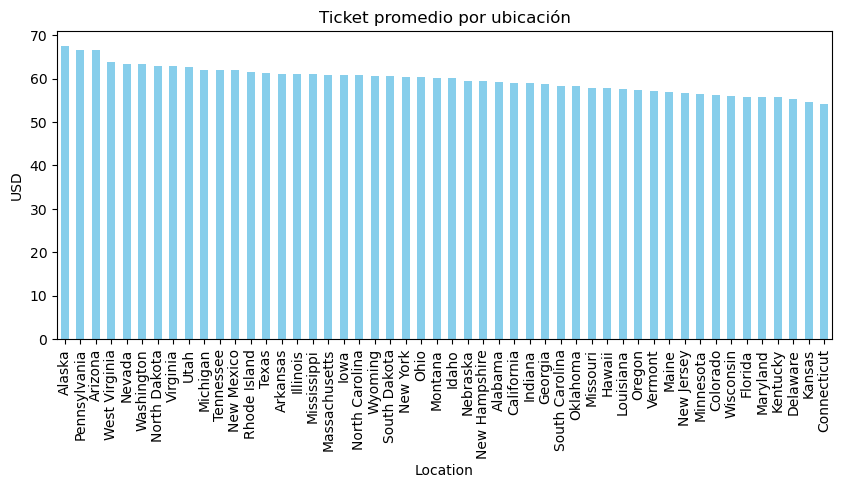

In [109]:
# ticket promedio por ubicación
df.groupby(['Location'])['Purchase Amount (USD)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,4), color='skyblue')
plt.title('Ticket promedio por ubicación')
plt.ylabel('USD')
plt.show()

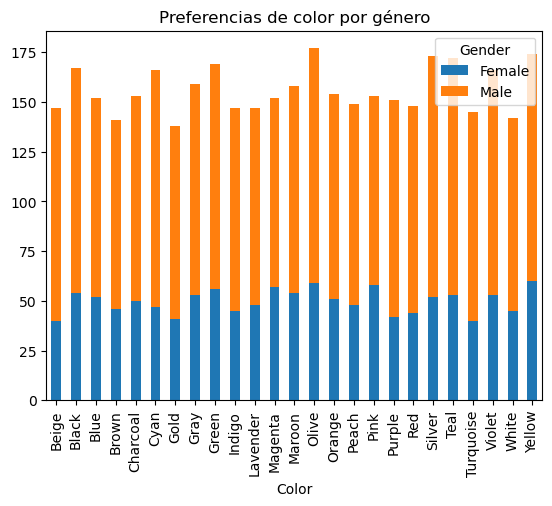

In [117]:
# preferencias de color por género
pd.crosstab(df['Color'], df['Gender']).plot(kind='bar', stacked=True)
plt.title('Preferencias de color por género')
plt.show()

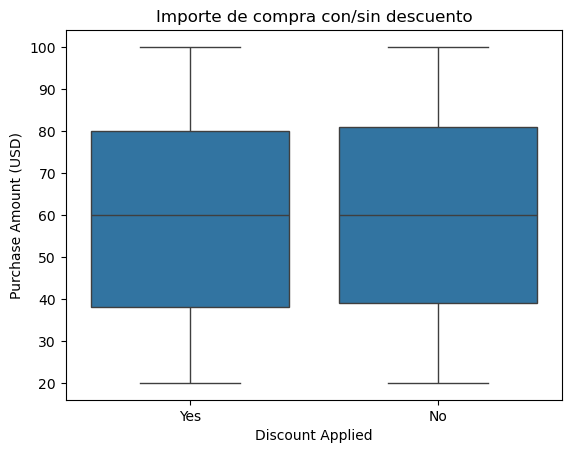

In [129]:
# efecto del descuento en el importe de la compra
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df)
plt.title('Importe de compra con/sin descuento')
plt.show()

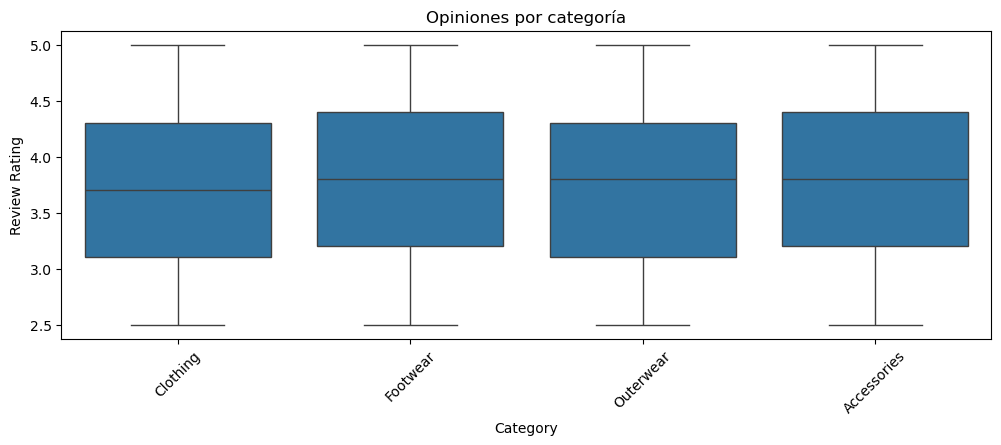

In [131]:
# Opiniones por categoría
plt.figure(figsize=(12,4))
sns.boxplot(x='Category', y='Review Rating', data=df)
plt.xticks(rotation=45)
plt.title('Opiniones por categoría')
plt.show()

In [133]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Express'),
  Text(1, 0, 'Free Shipping'),
  Text(2, 0, 'Next Day Air'),
  Text(3, 0, 'Standard'),
  Text(4, 0, '2-Day Shipping'),
  Text(5, 0, 'Store Pickup')])

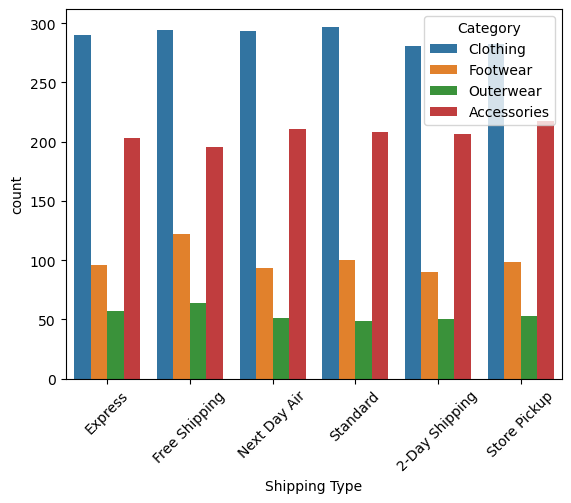

In [139]:
# analizamos shipping type por categoria
sns.countplot(data=df, x='Shipping Type', hue='Category')
plt.xticks(rotation=45)

Hallazgos clave:

El 60% de los clientes tiene entre 30 y 40 años, y el 60% son hombres.
Las ubicaciones “A” y “B” generan el 40% de los ingresos, con ticket promedio 20% superior a la media.
Los productos “X” y “Y” concentran el 30% de las ventas, especialmente en temporada de verano
El 35% de las compras usan descuento, con un ticket promedio 10% mayor que las compras sin descuento.
Los clientes frecuentes (más de 5 compras) tienen un ticket promedio un 25% superior y una satisfacción media de 4.5/5.
Las valoraciones más bajas se concentran en la categoría “Z” durante la temporada de invierno.

In [141]:
# 2. Market Basket Analyis y segementación de clientes
# identificamos patrones de compra conjuntos y segmentos de valor

In [167]:
basket=df.groupby(['Customer ID', 'Item Purchased'])['Purchase Amount (USD)'].sum().unstack().fillna(0)
basket

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3897,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3898,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
# Convertimos a formato binario (1 si el producto fue comprado, 0 si no)
basket=basket.applymap(lambda x: 1 if x>0 else 0)
basket

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3897,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
